# Signal Filters

## Introduction
In signal processing, a digital filter is an algoritm that performs mathematical operations on a sampled, discrete-time signal to reduce or enhance certain aspects of that signal. This is in contrast to the other major type of electronic filter, the analog filter, which is typically an electronic circuit operating on continuous-time analog signals.

<b>References</b>
<ul>
  <li><a href = "https://training.dewesoft.com/online/course/filters#:~:text=in%20Dewesoft%20X.-,In%20the%20field%20of%20signal%20processing%2C%20a%20filter%20is%20a,and%20to%20reduce%20background%20noise">Butterworth and Chebyshev Filters</a></li>
  <li><a href = "https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Electronics/Microwave_and_RF_Design_IV%3A_Modules_(Steer)/02%3A_Filters/2.07%3A_Butterworth_and_Chebyshev_Filters">Signal filtering, Signal suppression, Signal Processing</a></li>
  <li><a href = "https://www.dsprelated.com/freebooks/filters/">Introduction to Digital Filters</a>
  <li><a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html#scipy.signal.butter">SciPi Butterworth Filter API</a>
  <li><a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby1.html#scipy.signal.cheby1">SciPi Type I Chebychev Filter API</a></li>
  <li><a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cheby2.html#scipy.signal.cheby2">SciPi Type II Chebychev Filter API</a></li>
</ul>

## Filter Terminology

<ul>
  <li><b>Attenuate</b> - to decrease the amplitude of an electronic signal, with little or no distortion. [1]</li>

  <li><b>Cutoff frequency</b> - the frequency beyond which the filter will not pass a signal. [1]</li>

  <li><b>Roll-off</b> - a rate at which attenuation increases beyond the cutoff frequency. The steepness of the transition between the pass-band and stop-band. [1]</li>

  <li><b>Transition band</b> - the band of frequencies between a pass-band and stop-band. [1]</li>

  <li><b>Ripple</b> - the maximum amplitude error of the filter in the passband in dB. [1]</li>

  <li><b>Order</b> - the degree of the approximating polynomial (increasing order increases roll-off and brings the filter closer to the ideal response). [1]</li>

  <li><b>Sampling Frequency</b> - The frequency at which the digital system samples a signal</li>
</ul>

## Types of Filters

### Filters by frequency filtering:

In practical applications, high-pass, low-pass, band-pass, and band-stop filters are commonly design and used.  

<ul>
  <li>A <b>high-pass</b> filter allows signals with a frequency higher that the "cutoff frequency" to pass and blocks (filters out), signals with a frequency lower than the cutoff.  The frequencies that the filter allows to pass are called the "passband" and those that they filter out are called the "stopband".  A filter attenuates the stopband, in effect, removing the stopband.</li>

  <li>A <b>low-pass</b> filter is the opposite of the high-pass filter.  The passband is the frequencies below the cutoff and the stopband are the frenquencies higher than the cutoff.</li>

  <li>A <b>band-pass</b> filter allows frequencies between a "high cutoff" and a "low cutoff" to pass.  The frenquencies within this range are the passband.  Frequncies outside the passband are are the stopband.</li>

  <li>A <b>band-stop</b> filter performs the opposite operation of the band-pass filter.  The stopband are all the frequencies between the cutoffs and the passband is all other frequencies.</li>
</ul>

### Some Common Filter Types

<b>Butterworth</b> and <b>Chebyshev</b> filters are special cases of <b>elliptical</b> filters, which are also called <b>Cauer</b> filters. In general, an elliptical filter has ripple in both the stopband and the passband. The level of the ripple can be selected. With ripple in both the passband and stopband, the transition between the passband and stopband can be made more abrupt or alternatively the tolerance to component variations increased. [2]

<ul>
  <li><b>Butterworth</b> - An elliptical filter with zero ripple in the passband and stopband.  The have a relatively slow transition from the passband to the stopband.</li>

  <li><b>Chebyshev type I</b> - An elliptical filter with zero stopband ripple and some passband ripple. [2]</li>

  <li><b>Chebyshev type II</b> - An elliptical filter with some stopband ripple and zero passband ripple.</li>
</ul>

### Other Filter Information

A linear filter is a linear transformation of input samples; other filters are nonlinear. Linear filters satisfy the superposition principle, i.e. if an input is a weighted linear combination of different signals, the output is a similarly weighted linear combination of the corresponding output signals. [3]

A causal filter uses only previous samples of the input or output signals; while a non-causal filter uses future input samples. A non-causal filter can usually be changed into a causal filter by adding a delay to it. [3]

A time-invariant filter has constant properties over time; other filters such as adaptive filters change in time. [3]

A stable filter produces an output that converges to a constant value with time, or remains bounded within a finite interval. An unstable filter can produce an output that grows without bounds, with bounded or even zero input. [3]

A finite impulse response (FIR) filter uses only the input signals, while an infinite impulse response (IIR) filter uses both the input signal and previous samples of the output signal. FIR filters are always stable, while IIR filters may be unstable. [3]

In [ ]:
# Package Imports
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

import re
import pytz
from datetime import datetime

import enum

from scipy import signal
from scipy.signal import butter, lfilter, cheby1, cheby2
from numpy import array

In [ ]:
# Highpass filters

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def cheby1_highpass(cutoff, fs, max_rip=5, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.cheby1(N = order, rp = max_rip, Wn = normal_cutoff, btype='high', analog=False)
    return b, a

def cheby1_highpass_filter(data, max_ripple, cutoff, fs, order=5):
    b, a = cheby1_highpass(cutoff=cutoff, max_rip = max_ripple, fs=fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def cheby2_highpass(cutoff, fs, min_attn=5, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.cheby2(N = order, rs = min_attn, Wn = normal_cutoff, btype='high', analog=False)
    return b, a

def cheby2_highpass_filter(data, min_attenuation, cutoff, fs, order=5):
    b, a = cheby2_highpass(cutoff=cutoff, min_attn = min_attenuation, fs=fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [ ]:
# Lowpass filters

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

def cheby1_lowpass(cutoff, fs, max_rip=5, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.cheby1(N = order, rp = max_rip, Wn = normal_cutoff, btype='low', analog=False)
    return b, a

def cheby1_lowpass_filter(data, max_ripple, cutoff, fs, order=5):
    b, a = cheby1_lowpass(cutoff=cutoff, max_rip = max_ripple, fs=fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def cheby2_lowpass(cutoff, fs, min_attn=5, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.cheby2(N = order, rs = min_attn, Wn = normal_cutoff, btype='low', analog=False)
    return b, a

def cheby2_lowpass_filter(data, min_attenuation, cutoff, fs, order=5):
    b, a = cheby2_lowpass(cutoff=cutoff, min_attn = min_attenuation, fs=fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [ ]:
# Bandpass Filters

def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

def cheby1_bandpass(lowcut, highcut, fs, max_rip=5, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.cheby1(N = order, rp = max_rip, Wn = [low, high], btype='band', analog=False)
    return b, a

def cheby1_bandpass_filter(data, max_ripple, lowcut, highcut, fs, order=5):
    b, a = cheby1_bandpass(lowcut=lowcut, highcut=highcut, max_rip = max_ripple, fs=fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def cheby2_bandpass(lowcut, highcut, fs, min_attn=5, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.cheby2(N = order, rs = min_attn, Wn = [low, high], btype='band', analog=False)
    return b, a

def cheby2_bandpass_filter(data, min_attenuation, lowcut, highcut, fs, order=5):
    b, a = cheby2_bandpass(lowcut=lowcut, highcut=highcut, min_attn = min_attenuation, fs=fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [ ]:
# Bandstop filters
def butter_bandstop(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    i, u = butter(order, [low, high], btype='bandstop')
    return i, u

def butter_bandstop_filter(data, lowcut, highcut, fs, order=5):
    i, u = butter_bandstop(lowcut, highcut, fs, order=order)
    y = signal.lfilter(i, u, data)
    return y

def cheby1_bandstop(lowcut, highcut, fs, max_rip=5, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.cheby1(N = order, rp = max_rip, Wn = [low, high], btype='bandstop', analog=False)
    return b, a

def cheby1_bandstop_filter(data, max_ripple, lowcut, highcut, fs, order=5):
    b, a = cheby1_bandstop(lowcut=lowcut, highcut=highcut, max_rip = max_ripple, fs=fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def cheby2_bandstop(lowcut, highcut, fs, min_attn=5, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.cheby2(N = order, rs = min_attn, Wn = [low, high], btype='bandstop', analog=False)
    return b, a

def cheby2_bandstop_filter(data, min_attenuation, lowcut, highcut, fs, order=5):
    b, a = cheby2_bandstop(lowcut=lowcut, highcut=highcut, min_attn = min_attenuation, fs=fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [ ]:
def filter_plot(filter_name,sig,t,fs,lowcut,highcut,orders=[5],max_rip=5,min_attn=5):
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.signal import freqz

  # Plot the frequency response for a few different orders.
  plt.figure(1)
  plt.clf()
  for order in orders:
    if filter_name == 'butter_bp':
      b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    elif filter_name == 'butter_hp':
      b, a = butter_highpass(lowcut, fs, order=order)
    elif filter_name == 'butter_lp':
      b, a = butter_lowpass(highcut, fs, order=order)
    elif filter_name == 'cheby1_bp':
      b, a = cheby1_bandpass(max_rip=max_rip, lowcut=lowcut, highcut=highcut, fs=fs, order=order)
    elif filter_name == 'cheby1_hp':
      b, a = cheby1_highpass(max_rip, lowcut, fs, order=order)
    elif filter_name == 'cheby1_lp':
      b, a = cheby1_lowpass(max_rip, highcut, fs, order=order)
    elif filter_name == 'cheby2_bp':
      b, a = cheby2_bandpass(min_attn=min_attn, lowcut=lowcut, highcut=highcut, fs=fs, order=order)
    elif filter_name == 'cheby2_hp':
      b, a = cheby2_highpass(min_attn, lowcut, fs, order=order)
    elif filter_name == 'cheby2_lp':
      b, a = cheby2_lowpass(min_attn, highcut, fs, order=order)
    elif filter_name == 'butter_bs':
      b, a = butter_bandstop(lowcut, highcut, fs, order=order)
    elif filter_name == 'cheby1_bs':
      b, a = cheby1_bandstop(max_rip=max_rip, lowcut=lowcut, highcut=highcut, fs=fs, order=order)
    elif filter_name == 'cheby2_bs': # Not working
      b, a = cheby2_bandstop(min_attn=min_attn, lowcut=lowcut, highcut=highcut, fs=fs, order=order)
    else:
      b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

  plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],'--', label='sqrt(0.5)')
  plt.xlabel('Frequency (Hz)')
  plt.ylabel('Gain')
  plt.grid(True)
  plt.legend(loc='best')

  # Filter a noisy signal.
  #f0 = 20.0
  x = sig
  plt.figure(2)
  plt.clf()
  plt.plot(t, x, label='Noisy signal')

  # Butterworth filters
  if filter_name == 'butter_bp':
    f0 = int((highcut-lowcut)/2+lowcut)
    label='Filtered signal (%g Hz)' % f0
    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=orders[-1])
  elif filter_name == 'butter_bs':
    f0 = int((highcut-lowcut)/2+lowcut)
    label='Blocked signal (%g Hz)' % f0
    y = butter_bandstop_filter(x, lowcut, highcut, fs, order=orders[-1])
  elif filter_name == 'butter_hp':
    f0 = int(lowcut)
    label='Signals above (%g Hz)' % f0
    y = butter_highpass_filter(x, lowcut, fs, order=orders[-1])
  elif filter_name == 'butter_lp':
    f0 = int(highcut)
    label='Signals below (%g Hz)' % f0
    y = butter_lowpass_filter(x, highcut, fs, order=orders[-1])
  # Cheby1 filters
  elif filter_name == 'cheby1_bp':
    f0 = int((highcut-lowcut)/2+lowcut)
    label='Filtered signal (%g Hz)' % f0
    y = cheby1_bandpass_filter(x, max_rip,lowcut, highcut, fs, order=orders[-1])
  elif filter_name == 'cheby1_bs':
    f0 = int((highcut-lowcut)/2+lowcut)
    label='Blocked signal (%g Hz)' % f0
    y = cheby1_bandstop_filter(x, max_rip, lowcut, highcut, fs, order=orders[-1])
  elif filter_name == 'cheby1_hp':
    f0 = int(lowcut)
    label='Signals above (%g Hz)' % f0
    y = cheby1_highpass_filter(x, max_rip,lowcut, fs, order=orders[-1])
  elif filter_name == 'cheby1_lp':
    f0 = int(highcut)
    label='Signals below (%g Hz)' % f0
    y = cheby1_lowpass_filter(x, max_rip, highcut, fs, order=orders[-1])
  # Cheby2 filters
  elif filter_name == 'cheby2_bp':
    f0 = int((highcut-lowcut)/2+lowcut)
    label='Filtered signal (%g Hz)' % f0
    y = cheby2_bandpass_filter(x, min_attn, lowcut, highcut, fs, order=orders[-1])
  elif filter_name == 'cheby2_bs':
    f0 = int((highcut-lowcut)/2+lowcut)
    label='Blocked signal (%g Hz)' % f0
    y = cheby2_bandstop_filter(x, min_attn, lowcut, highcut, fs, order=orders[-1])
  elif filter_name == 'cheby2_hp':
    f0 = int(lowcut)
    label='Signals above (%g Hz)' % f0
    y = cheby2_highpass_filter(x, min_attn, lowcut, fs, order=orders[-1])
  elif filter_name == 'cheby2_lp':
    f0 = int(highcut)
    label='Signals below (%g Hz)' % f0
    y = cheby2_lowpass_filter(x, min_attn, highcut, fs, order=orders[-1])
  plt.plot(t, y, label=label)
  plt.xlabel('time (seconds)')
  plt.grid(True)
  plt.axis('tight')
  plt.legend(loc='upper left')

  plt.show()

In [ ]:
# Sample rate and desired cutoff frequencies (in Hz).
fs = 60.0
lowcut = 15.0
highcut = 25.0
orders = [3,6,9]

# Filter a noisy signal.
T = 1
nsamples = 100 #int(T * fs)
t = np.linspace(0, T, nsamples, endpoint=False)
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t) + np.sin(2*np.pi*30*t) # 10 Hz + 20 Hz + 30 Hz

#Highpass Filters

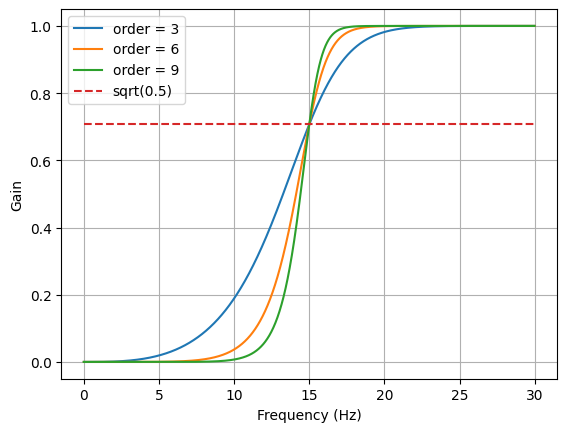

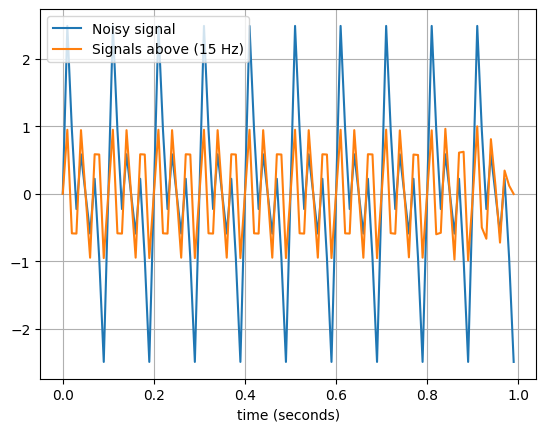

In [ ]:
#High Pass (butter)
filter_plot('butter_hp',sig,t,fs,lowcut,highcut,orders)

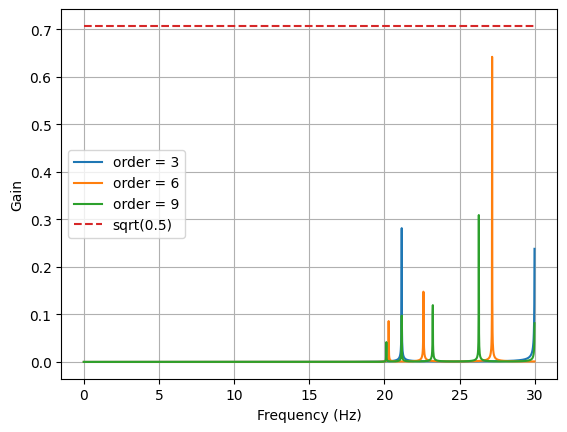

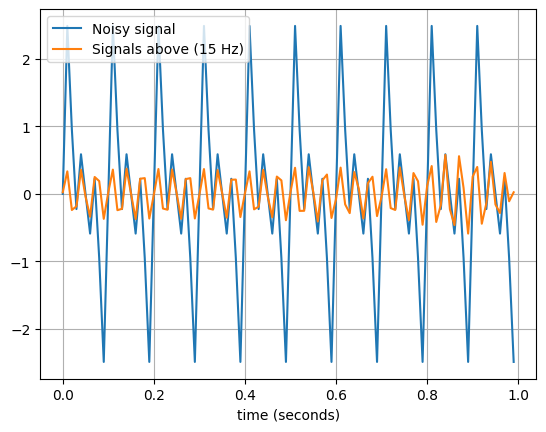

In [ ]:
# High Pass (cheby1)
filter_plot('cheby1_hp',sig,t,fs,lowcut,highcut,orders)

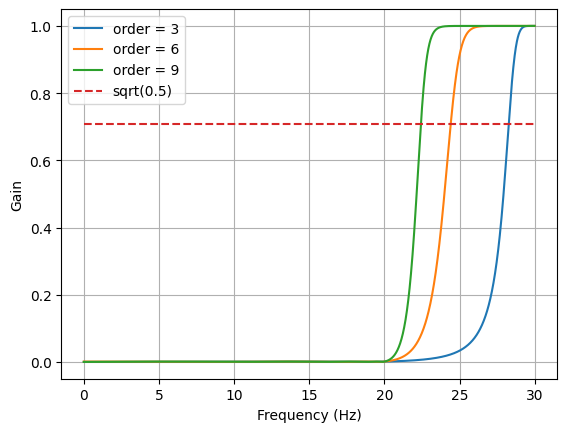

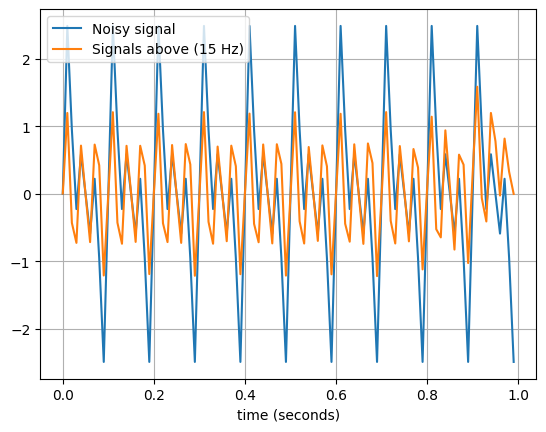

In [ ]:
# High Pass (cheby2)
filter_plot('cheby2_hp',sig,t,fs,lowcut,highcut,orders)

#Lowpass Filters

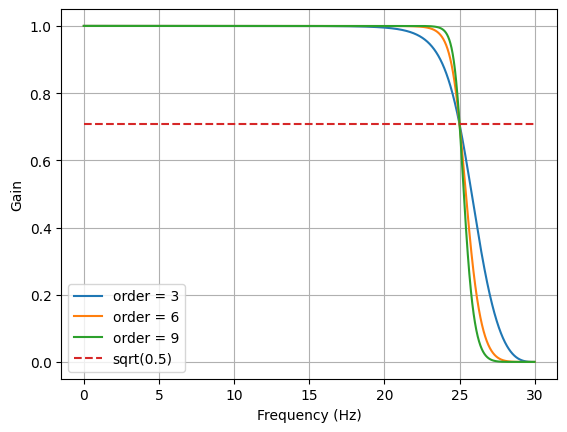

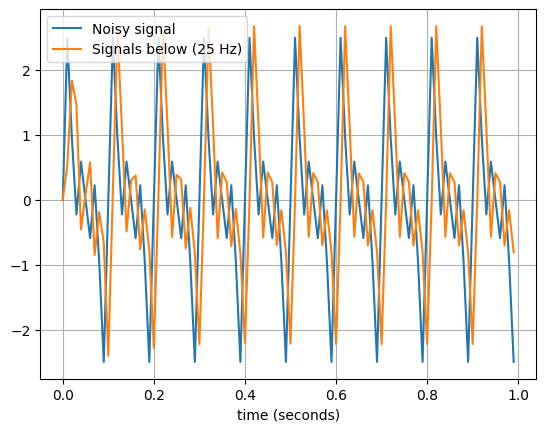

In [ ]:
#Low Pass (butter)
filter_plot('butter_lp',sig,t,fs,lowcut,highcut,orders)

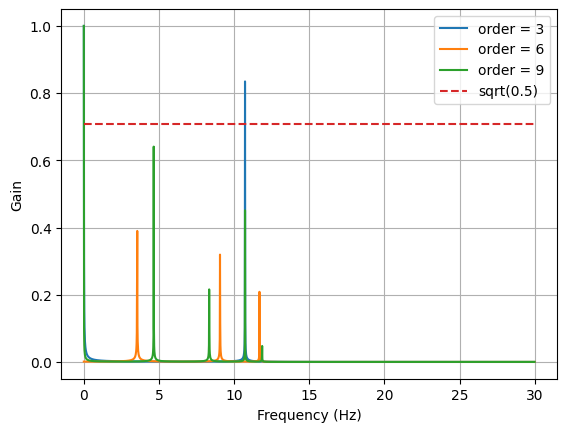

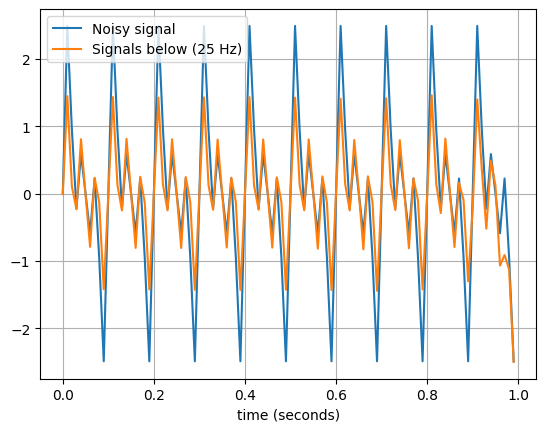

In [ ]:
# Low Pass (cheby1)
filter_plot('cheby1_lp',sig,t,fs,lowcut,highcut,orders)

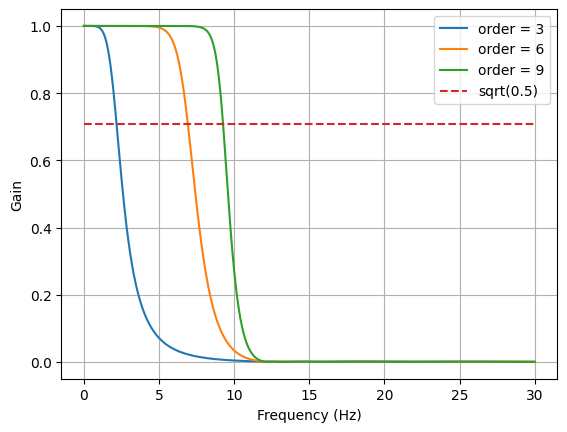

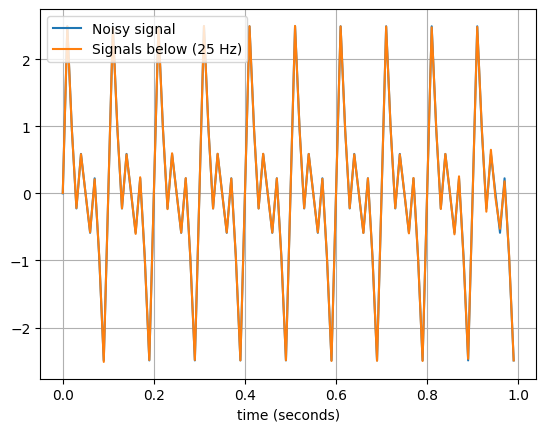

In [ ]:
# Low Pass (cheby2)
filter_plot('cheby2_lp',sig,t,fs,lowcut,highcut,orders)

#Bandpass Filters

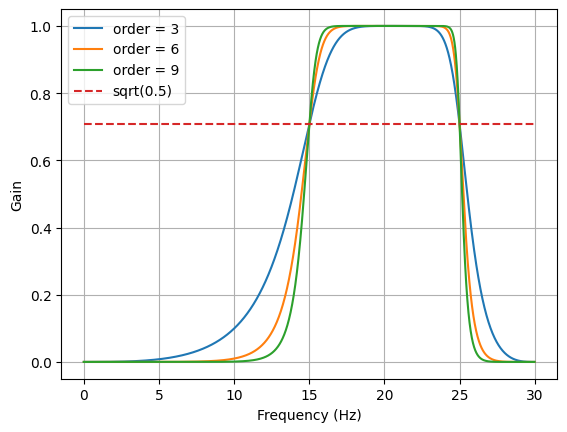

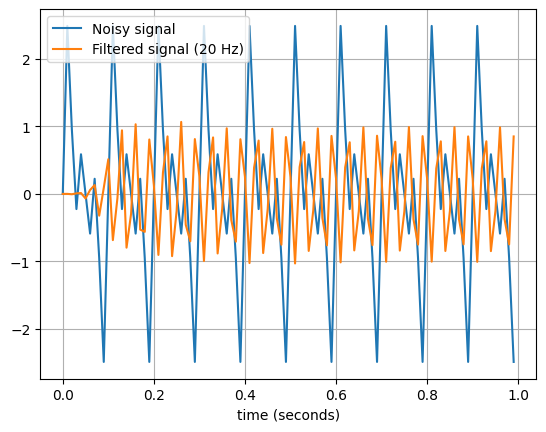

In [ ]:
#Band Pass (butter)
filter_plot('butter_bp',sig,t,fs,lowcut,highcut,orders)

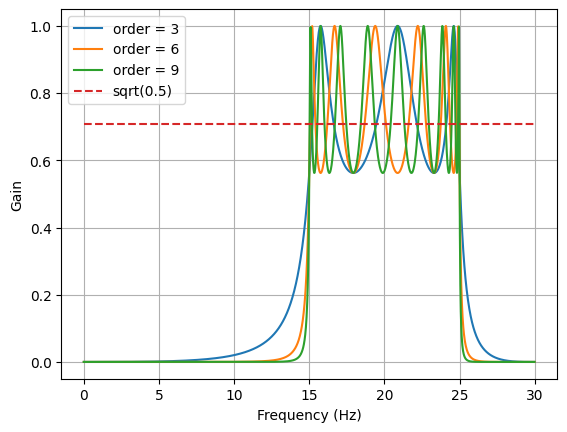

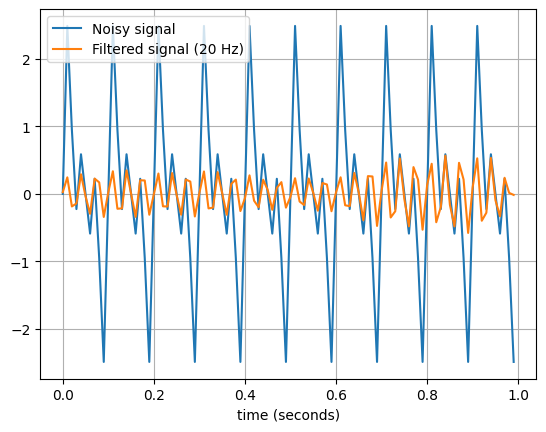

In [ ]:
# Band Pass (cheby1)
filter_plot('cheby1_bp',sig,t,fs,lowcut,highcut,orders)

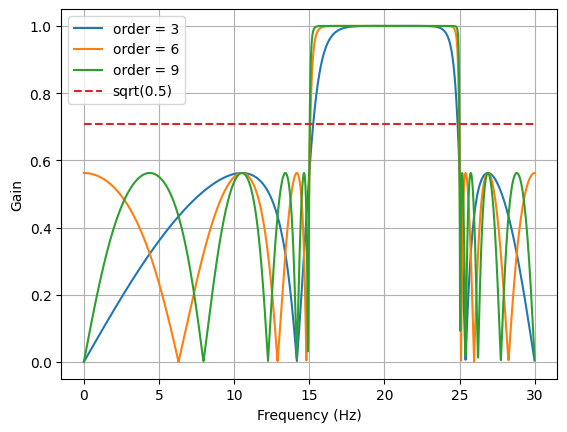

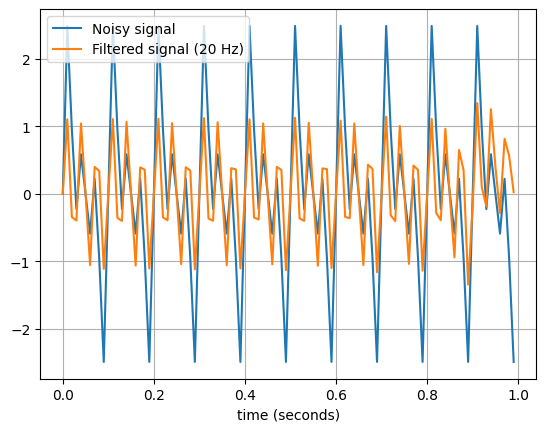

In [ ]:
# Band Pass (cheby2)
filter_plot('cheby2_bp',sig,t,fs,lowcut,highcut,orders)

#Bandstop Filters

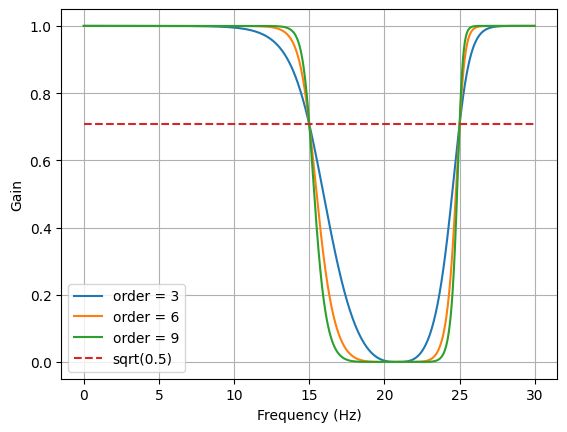

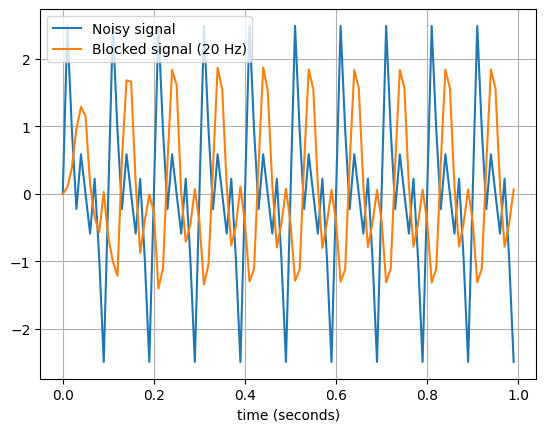

In [ ]:
#Band Stop (butter)
filter_plot('butter_bs',sig,t,fs,lowcut,highcut,orders)

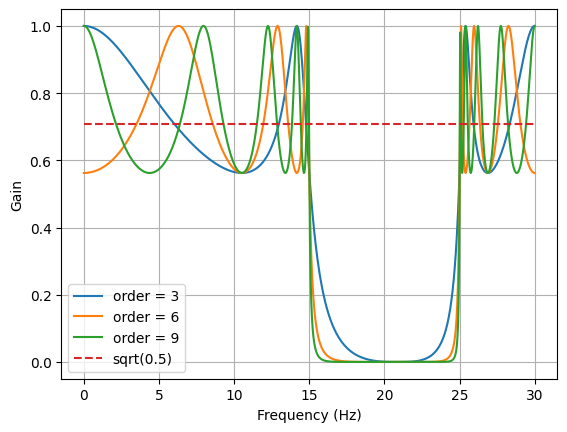

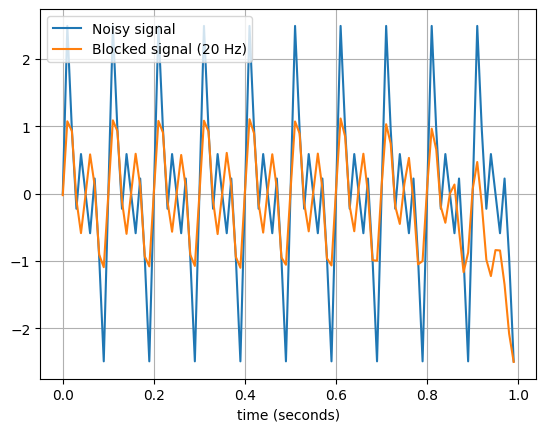

In [ ]:
# Band Stop (cheby1)
filter_plot('cheby1_bs',sig,t,fs,lowcut,highcut,orders)

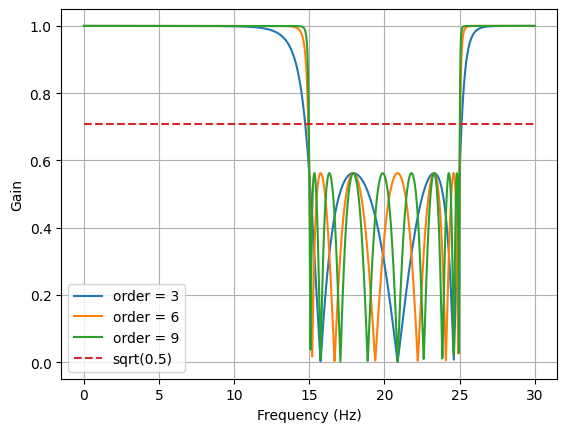

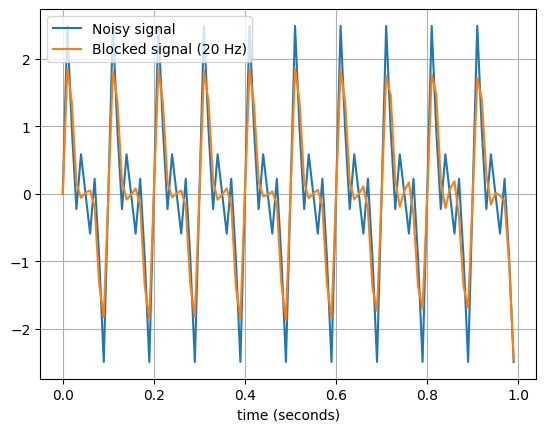

In [ ]:
# Band Stop (cheby2)
filter_plot('cheby2_bs',sig,t,fs,lowcut,highcut,orders)